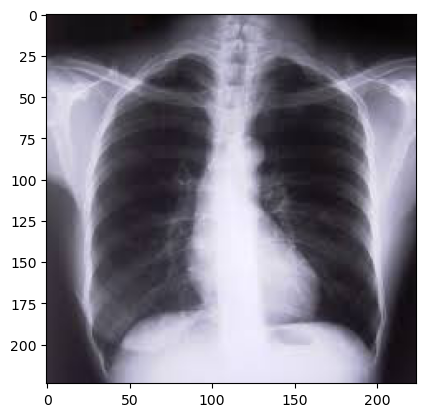

In [2]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import numpy as np
import cv2
import os
import torch
import torch.nn as nn

image_path = r'C:\Users\Chris\Desktop\images.jpg'
image = mpimg.imread(image_path)

plt.imshow(image, cmap = 'gray')
plt.show()

In [3]:
cv2.imread(r'C:\Users\Chris\Desktop\images.jpg').shape

(224, 224, 3)

In [4]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)


train_dataset = train.flow_from_directory(r'C:\Users\Chris\Desktop\x-ray\basedata\training',
                                          target_size=(200, 200), 
                                          batch_size = 100, 
                                          class_mode = 'binary')

validation_dataset = validation.flow_from_directory(r'C:\Users\Chris\Desktop\x-ray\basedata\validation',
                                          target_size=(200, 200), 
                                          batch_size = 100, 
                                          class_mode = 'binary')

Found 4200 images belonging to 3 classes.
Found 348 images belonging to 3 classes.


In [5]:
train_dataset.class_indices

{'normal': 0, 'pneumonia': 1, 'severe_covid19': 2}

In [6]:
train_dataset.classes

array([0, 0, 0, ..., 2, 2, 2])

In [10]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation ='relu', input_shape =(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                     ##                                   
                                   tf.keras.layers.Conv2D(32,(3,3),activation ='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                     ##
                                   tf.keras.layers.Conv2D(64,(3,3),activation ='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                     ##                                    
                                   tf.keras.layers.Flatten(),                                    
                                   tf.keras.layers.Dense(512, activation='relu'),
                                    ##
                                   tf.keras.layers.Dense(1, activation='sigmoid'),
                                    ])

In [11]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Adjust learning rate as needed
              metrics=['accuracy'])

In [12]:
history = model.fit(train_dataset,
                          batch_size=32,
                          epochs=8,
                          validation_data=validation_dataset)

Epoch 1/8
42/42 [==============================] - 165s 4s/step - loss: 0.0000e+00 - accuracy: 0.4919 - val_loss: 0.0000e+00 - val_accuracy: 0.2759
Epoch 2/8
42/42 [==============================] - 161s 4s/step - loss: 0.0000e+00 - accuracy: 0.5140 - val_loss: 0.0000e+00 - val_accuracy: 0.3161
Epoch 3/8
42/42 [==============================] - 158s 4s/step - loss: 0.0000e+00 - accuracy: 0.5831 - val_loss: 0.0000e+00 - val_accuracy: 0.3132
Epoch 4/8
42/42 [==============================] - 323s 8s/step - loss: 0.0000e+00 - accuracy: 0.5855 - val_loss: 0.0000e+00 - val_accuracy: 0.3161
Epoch 5/8
42/42 [==============================] - 189s 4s/step - loss: 0.0000e+00 - accuracy: 0.5876 - val_loss: 0.0000e+00 - val_accuracy: 0.3161
Epoch 6/8
42/42 [==============================] - 162s 4s/step - loss: 0.0000e+00 - accuracy: 0.5607 - val_loss: 0.0000e+00 - val_accuracy: 0.3161
Epoch 7/8
42/42 [==============================] - 619s 15s/step - loss: 0.0000e+00 - accuracy: 0.5871 - val_los

In [13]:
loss, accuracy = model.evaluate(train_dataset, steps=len(train_dataset))
print("Test Accuracy: ", accuracy)
print("Test loss: ", loss)

42/42 [==============================] - 92s 2s/step - loss: 0.0000e+00 - accuracy: 0.5493
Test Accuracy:  0.5492857098579407
Test loss:  0.0


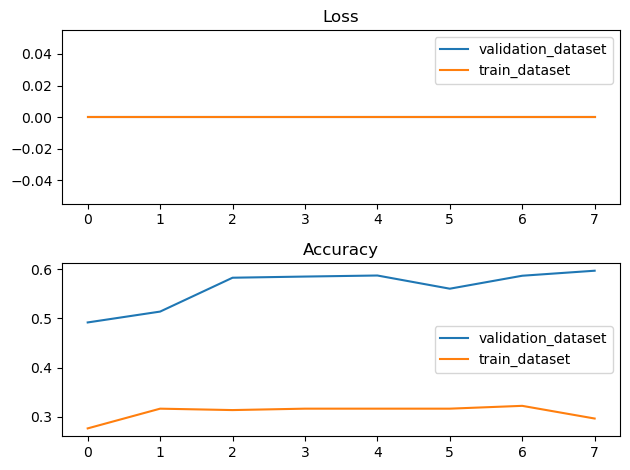

In [16]:
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='validation_dataset')
pyplot.plot(history.history['val_loss'], label='train_dataset')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='validation_dataset')
pyplot.plot(history.history['val_accuracy'], label='train_dataset')
pyplot.legend()

plt.tight_layout()
pyplot.show()

In [18]:
from sklearn.model_selection import KFold

model.compile(optimizer = 'Adam',
              loss= 'binary_crossentropy',
              metrics = ['accuracy'])

num_folds = 5
num_channels = 20

kfold = KFold(n_splits=num_folds, shuffle = True)

accuracies = []
precisions = []
recalls = []
f1_scores = []

for fold_index, (train_indices, test_indices) in enumerate(kfold.split(range(num_folds))):
    print(f"Training Fold {fold_index + 1}...")
    

    accuracy = model.evaluate(validation_dataset)
    predictions = model.predict(validation_dataset)
    y_val = validation_dataset.classes
    y_pred = np.round(predictions)

    precision = tf.keras.metrics.Precision()(y_val, y_pred).numpy()
    recall = tf.keras.metrics.Recall()(y_val, y_pred).numpy()
    f1_score = 2 * (precision * recall) / (precision + recall)

   
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

    average_accuracy = np.mean(accuracies)
    average_precision = np.mean(precisions)
    average_recall = np.mean(recalls)
    average_f1_score = np.mean(f1_scores)
print()
print()

print(f"Average Precision: {average_precision}")
print(f"Average Recall: {average_recall}")
print(f"Average F1 Score: {average_f1_score}")

Training Fold 1...
4/4 [==============================] - 5s 1s/step
Training Fold 2...


C:\Users\Chris\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Chris\anaconda3\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


4/4 [==============================] - 5s 1s/step
Training Fold 3...
4/4 [==============================] - 5s 1s/step
Training Fold 4...
4/4 [==============================] - 5s 1s/step
Training Fold 5...
4/4 [==============================] - 5s 1s/step


Average Precision: 0.6513513326644897
Average Recall: 0.41551727056503296
Average F1 Score: 0.5073684190104715


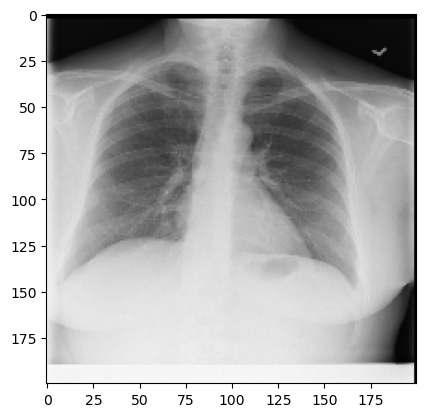

1/1 [==============================] - 0s 101ms/step
From my analysis you are healthy


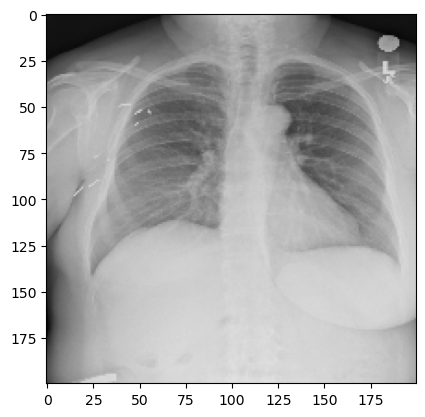

1/1 [==============================] - 0s 31ms/step
From my analysis you got covid-19


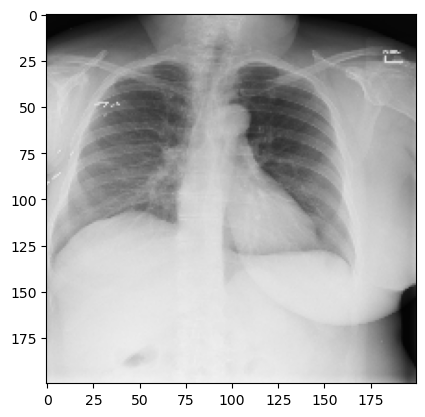

1/1 [==============================] - 0s 40ms/step
From my analysis you are healthy


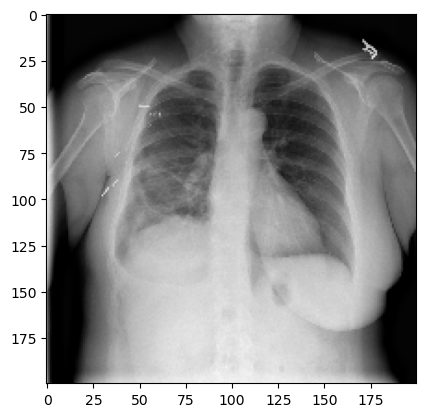

1/1 [==============================] - 0s 41ms/step
From my analysis you are healthy


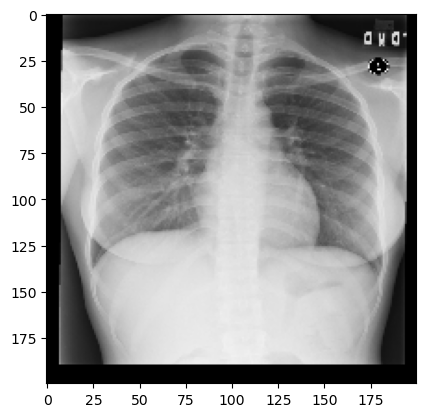

1/1 [==============================] - 0s 36ms/step
From my analysis you are healthy


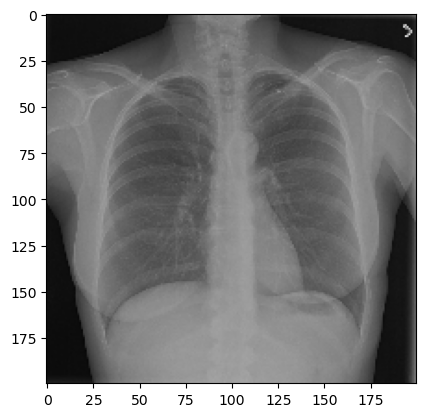

1/1 [==============================] - 0s 42ms/step
From my analysis you are healthy


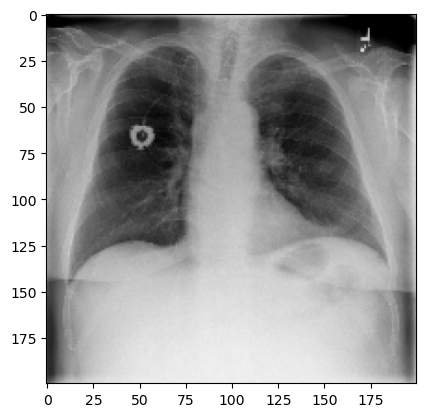

1/1 [==============================] - 0s 37ms/step
From my analysis you are healthy


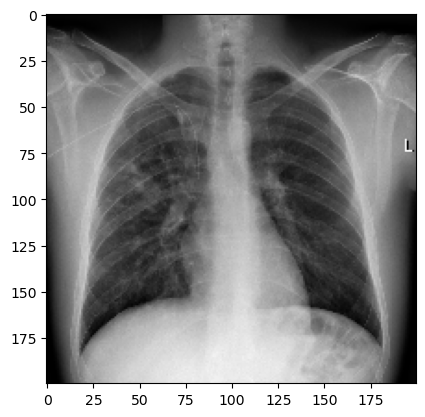

1/1 [==============================] - 0s 47ms/step
From my analysis you are healthy


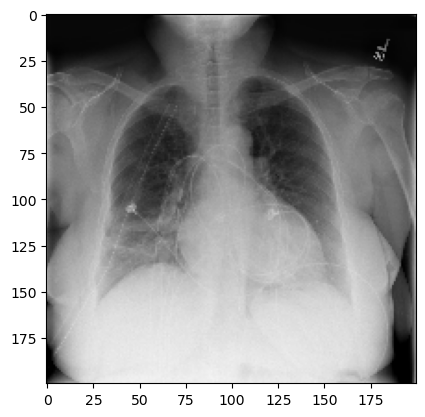

1/1 [==============================] - 0s 39ms/step
From my analysis you are healthy


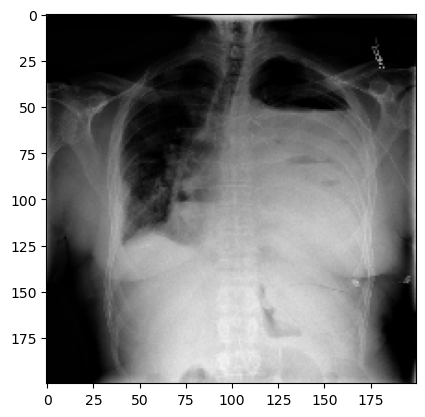

1/1 [==============================] - 0s 37ms/step
From my analysis you are healthy


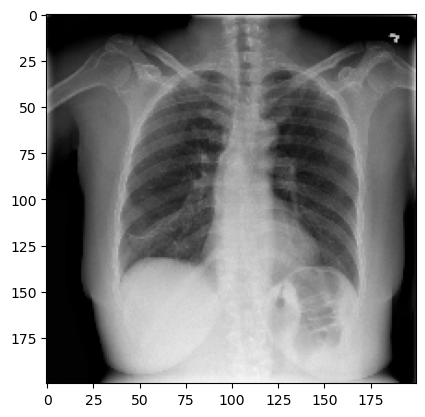

1/1 [==============================] - 0s 34ms/step
From my analysis you are healthy


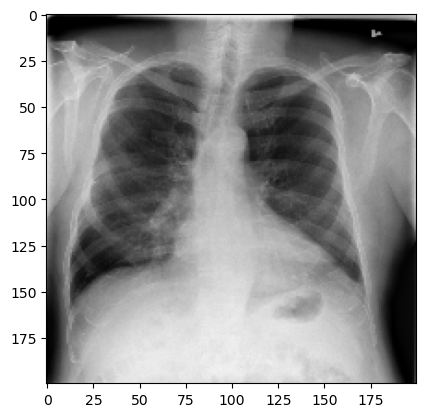

1/1 [==============================] - 0s 30ms/step
From my analysis you are healthy


In [19]:
from tensorflow.keras.utils import load_img, img_to_array
from keras.utils import load_img, img_to_array 
import os
import numpy as np
import matplotlib.pyplot as plt


dir_path = r"C:\\Users\Chris\Desktop\x-ray\basedata\testing"
for i in os.listdir(dir_path ):
    img = load_img(dir_path+'//'+ i, target_size = (200, 200))
    plt.imshow(img)
    plt.show()
    
    X = img_to_array(img)
    X = np.expand_dims(X, axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("From my analysis you are healthy")
    elif val == 1:
        print("From my analysis you got covid-19")
    else:
        print("From my analysis you got Pneumonia")
        
        
        
